# Time Series data analysis

> After preprocessing of the data we want to analyze the time series data

## Imports

In [27]:
import pandas as pd
import numpy as np
import pandas as pd
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Data

In [28]:
mergedData = '..\\data\\mergedData\\merged_df_04.csv'
df = pd.read_csv(mergedData)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

C:\Users\leand\AppData\Local\Temp\ipykernel_32024\2596009707.py:2: DtypeWarning: Columns (2,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(mergedData)


,Report_No,Reported_Date,Reported_Time,From_Date,Address,City,DVFlag,Involvement,Firearm Used Flag,Location,Offense_Description,lon,lat,dist_id,description_length,Offense_Cluster,Cluster_Name,Cluster_Description
0,150015427,03/06/2015,0:02,03/06/2015,BROADWAY and WESTPORT RD,KANSAS CITY,U,VIC,N,POINT (-94.5767 38.9767),Misc Violation,-94.5767,38.9767,6.0,2,10,Miscellaneous Violations,"Incidents involving miscellaneous violations, ..."
1,150057463,09/08/2015,1:17,09/08/2015,PROSPECT AV and E TRUMAN RD,KANSAS CITY,U,SUS,N,POINT (-94.5516 39.0947),Auto Theft,-94.5516,39.0947,3.0,2,26,Auto Theft and Burglary,"Incidents involving auto theft, burglary, and ..."
2,150033873,05/19/2015,0:21,05/19/2015,VICTOR ST and WALROND AV,KANSAS CITY,U,VIC,N,POINT (-94.5461 39.0735),Possession/Sale/Dist,-94.5461,39.0735,3.0,1,14,Possession and Sale of Controlled Substances,"Incidents involving possession, sale, and dist..."
3,150061779,08/31/2015,10:28,08/31/2015,PASEO and E TRUMAN RD,KANSAS CITY,N,SUS,N,POINT (-89.0251 42.2167),Non Aggravated Assau,-89.0251,42.2167,1.0,3,20,Assault and Battery,"Crimes involving assault, battery, and non-agg..."
4,150087307,12/04/2015,2:57,12/04/2015,PASEO and E TRUMAN RD,KANSAS CITY,U,VIC,N,POINT (-94.5645 39.0952),Misc Violation,-94.5645,39.0952,3.0,2,10,Miscellaneous Violations,"Incidents involving miscellaneous violations, ..."


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987906 entries, 0 to 987905
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Report_No            987906 non-null  object 
 1   Reported_Date        987906 non-null  object 
 2   Reported_Time        987906 non-null  object 
 3   From_Date            987906 non-null  object 
 4   Address              987906 non-null  object 
 5   City                 987906 non-null  object 
 6   DVFlag               987906 non-null  object 
 7   Involvement          987906 non-null  object 
 8   Firearm Used Flag    987906 non-null  object 
 9   Location             987906 non-null  object 
 10  Offense_Description  987906 non-null  object 
 11  lon                  987906 non-null  float64
 12  lat                  987906 non-null  float64
 13  dist_id              987906 non-null  float64
 14  description_length   987906 non-null  int64  
 15  Offense_Cluster  

> remove rows where date is before 2015

In [30]:
df['Reported_Date'] = pd.to_datetime(df['Reported_Date'], format='%m/%d/%Y')

In [31]:
# Loop until the minimum date year is 2015
while df.Reported_Date.min().year != 2015:
    min_date = df.Reported_Date.min()
    rows_with_min_date = len(df[df['Reported_Date'] == min_date])
    
    print(f"There are currently {rows_with_min_date} rows with date: {min_date.strftime('%m/%d/%Y')}")
    
    # Remove rows with the minimum date
    df = df[df['Reported_Date'] != min_date]
    
    print(f"Removed rows with date: {min_date.strftime('%m/%d/%Y')}")

There are currently 1 rows with date: 01/16/1923
Removed rows with date: 01/16/1923
There are currently 2 rows with date: 02/22/1923
Removed rows with date: 02/22/1923
There are currently 1 rows with date: 12/31/1977
Removed rows with date: 12/31/1977
There are currently 1 rows with date: 06/12/1980
Removed rows with date: 06/12/1980
There are currently 2 rows with date: 12/21/1981
Removed rows with date: 12/21/1981
There are currently 1 rows with date: 11/26/1989
Removed rows with date: 11/26/1989
There are currently 2 rows with date: 08/05/1990
Removed rows with date: 08/05/1990
There are currently 1 rows with date: 09/26/1991
Removed rows with date: 09/26/1991
There are currently 1 rows with date: 01/02/1996
Removed rows with date: 01/02/1996
There are currently 1 rows with date: 10/24/1998
Removed rows with date: 10/24/1998
There are currently 1 rows with date: 11/04/1998
Removed rows with date: 11/04/1998
There are currently 7 rows with date: 01/01/1999
Removed rows with date: 01/

## Analysis

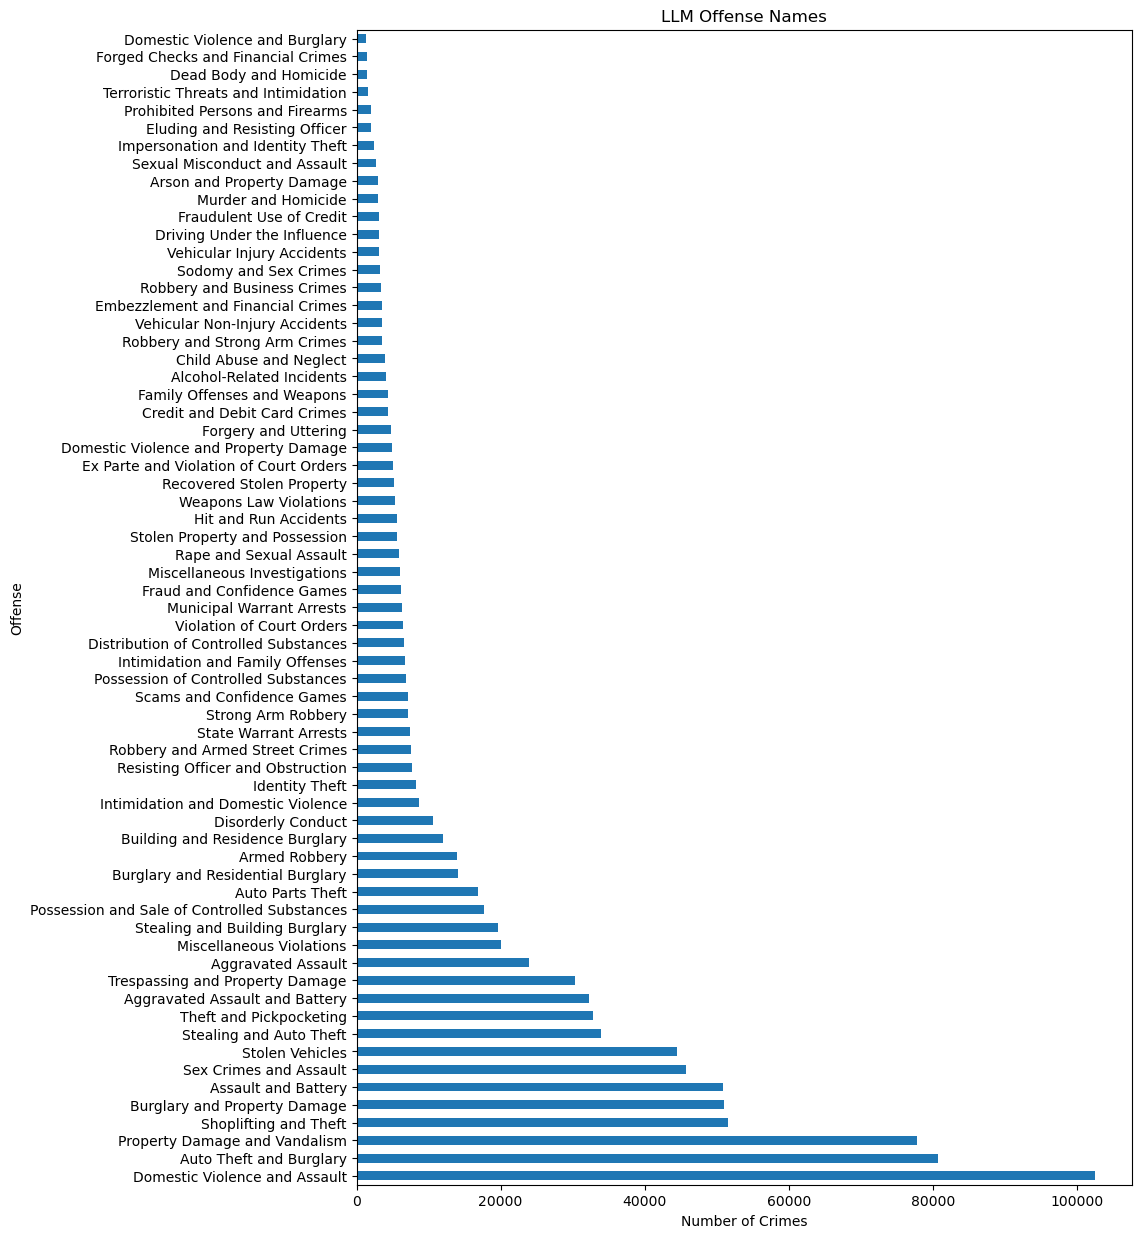

In [32]:
# Groupby by Cluster_Name
df_grouped_cluster_name = df.groupby("Cluster_Name")

plt.figure(figsize=(10,15))
df_grouped_cluster_name.size().sort_values(ascending=False).plot.barh()
plt.xlabel("Number of Crimes")
plt.ylabel("Offense")
plt.title("LLM Offense Names")
plt.show()

In [33]:
df[df["Cluster_Name"] == "Assault and Battery"][['Offense_Description', 'Offense_Cluster', 'Cluster_Name', 'Cluster_Description']].head()

,Offense_Description,Offense_Cluster,Cluster_Name,Cluster_Description
3,Non Aggravated Assau,20,Assault and Battery,"Crimes involving assault, battery, and non-agg..."
24,Non Aggravated Assau,20,Assault and Battery,"Crimes involving assault, battery, and non-agg..."
74,Non Aggravated Assau,20,Assault and Battery,"Crimes involving assault, battery, and non-agg..."
81,Non Aggravated Assau,20,Assault and Battery,"Crimes involving assault, battery, and non-agg..."
92,Non Aggravated Assau,20,Assault and Battery,"Crimes involving assault, battery, and non-agg..."


In [34]:
df[df["Cluster_Name"] == "Domestic Violence and Assault"][['Offense_Description', 'Offense_Cluster', 'Cluster_Name', 'Cluster_Description']].head()

,Offense_Description,Offense_Cluster,Cluster_Name,Cluster_Description
11,Non Agg Assault Dome,8,Domestic Violence and Assault,"Incidents of domestic violence, including assa..."
19,Non Agg Assault Dome,8,Domestic Violence and Assault,"Incidents of domestic violence, including assa..."
28,Non Agg Assault Dome,8,Domestic Violence and Assault,"Incidents of domestic violence, including assa..."
100,Non Agg Assault Dome,8,Domestic Violence and Assault,"Incidents of domestic violence, including assa..."
158,Agg Assault - Domest,23,Domestic Violence and Assault,"Incidents of domestic violence, including assa..."


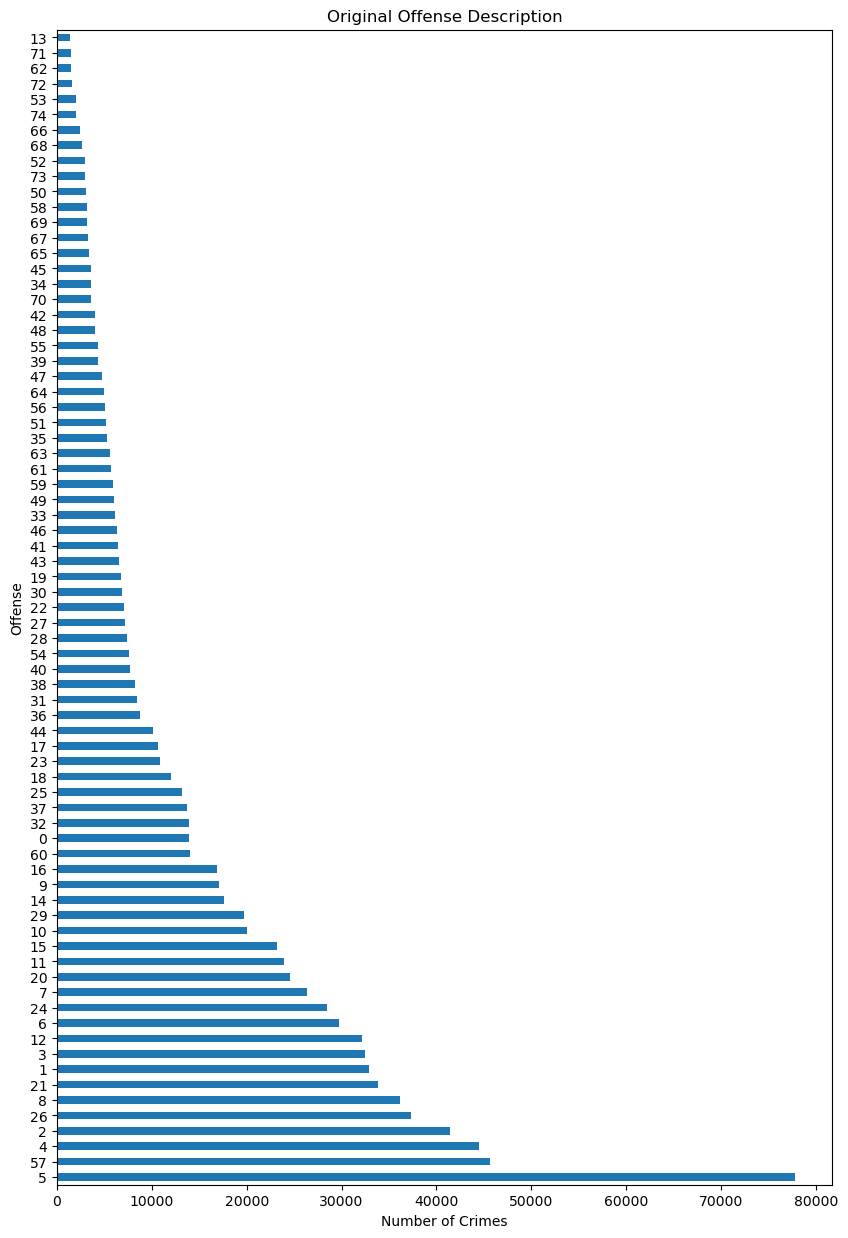

In [35]:
# Groupby by Offense_Cluster
df_grouped_cluster_name = df.groupby("Offense_Cluster")

plt.figure(figsize=(10,15))
df_grouped_cluster_name.size().sort_values(ascending=False).plot.barh()
plt.xlabel("Number of Crimes")
plt.ylabel("Offense")
plt.title("Original Offense Description")
plt.show()

In [36]:
df[df["Offense_Cluster"] == 5][['Offense_Description', 'Offense_Cluster', 'Cluster_Name', 'Cluster_Description']].head()

,Offense_Description,Offense_Cluster,Cluster_Name,Cluster_Description
21,Property Damage,5,Property Damage and Vandalism,"Crimes involving property damage, vandalism, a..."
48,Property Damage,5,Property Damage and Vandalism,"Crimes involving property damage, vandalism, a..."
75,Property Damage,5,Property Damage and Vandalism,"Crimes involving property damage, vandalism, a..."
89,Property Damage,5,Property Damage and Vandalism,"Crimes involving property damage, vandalism, a..."
91,Property Damage,5,Property Damage and Vandalism,"Crimes involving property damage, vandalism, a..."


## Wordcloud

In [37]:
text = " ".join(Offense_Description for Offense_Description in df.Offense_Description)
print ("There are {} words in the combination.".format(len(text)))

There are 22650219 words in the combination.


In [38]:
"""wordcloud = WordCloud(width=1000, height=800, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()"""

'wordcloud = WordCloud(width=1000, height=800, max_font_size=50, max_words=100, background_color="white").generate(text)\nplt.figure(figsize=(20,10), facecolor=\'k\')\nplt.imshow(wordcloud, interpolation="bilinear")\nplt.axis("off")\nplt.tight_layout(pad=0)\nplt.show()'

## Data splitting and general statistics

> The data has attributes so its possible to cluster it by region (District) and by Offense

In [39]:
df.columns

Index(['Report_No', 'Reported_Date', 'Reported_Time', 'From_Date', 'Address',
       'City', 'DVFlag', 'Involvement', 'Firearm Used Flag', 'Location',
       'Offense_Description', 'lon', 'lat', 'dist_id', 'description_length',
       'Offense_Cluster', 'Cluster_Name', 'Cluster_Description'],
      dtype='object')

In [40]:
ts_df = df.copy()

In [41]:
ts_df = ts_df[["Reported_Date", "dist_id", "Offense_Cluster", "lon", "lat"]]
ts_df.head()

,Reported_Date,dist_id,Offense_Cluster,lon,lat
0,2015-03-06,6.0,10,-94.5767,38.9767
1,2015-09-08,3.0,26,-94.5516,39.0947
2,2015-05-19,3.0,14,-94.5461,39.0735
3,2015-08-31,1.0,20,-89.0251,42.2167
4,2015-12-04,3.0,10,-94.5645,39.0952


> numbers of crimes per day

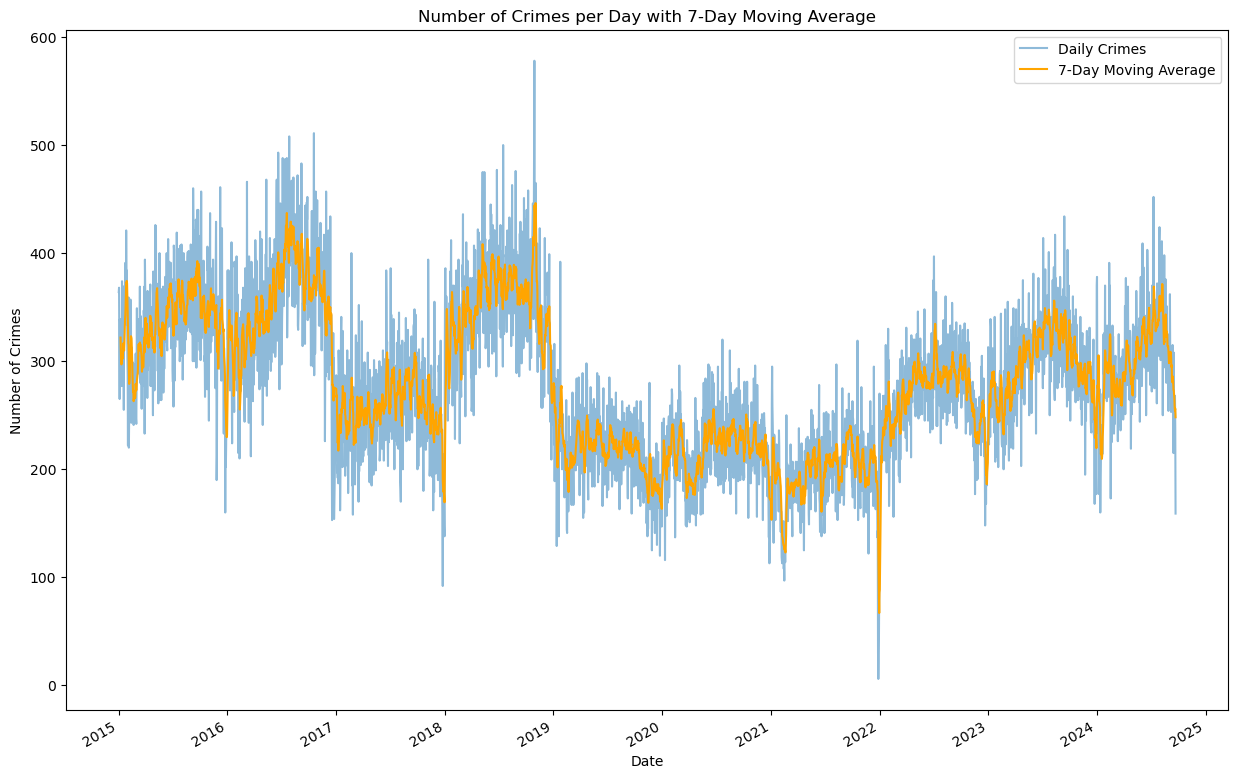

In [42]:
# Example dataframe and grouping by reported date
# ts_df['Reported_Date'] should be a datetime type already
ts_df_grouped_date = ts_df.groupby("Reported_Date").size()

# Sort the data by date
ts_df_grouped_date = ts_df_grouped_date.sort_index()

# Plot the original line plot of crimes per day
plt.figure(figsize=(15, 10))
ts_df_grouped_date.plot.line(label='Daily Crimes', alpha=0.5)

# Apply a moving average with a window size (e.g., 7 days for weekly average)
moving_average = ts_df_grouped_date.rolling(window=7).mean()

# Plot the moving average
moving_average.plot.line(label='7-Day Moving Average', color='orange')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes per Day with 7-Day Moving Average")
plt.legend()
plt.show()

> number of crimes per day per district

In [52]:
dist_ids = ts_df.dist_id.unique()
dist_ids = sorted(dist_ids)
print("dist_ids", dist_ids)
num_dists = len(dist_ids)
print("num_dists", num_dists)

dist_ids [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
num_dists 6


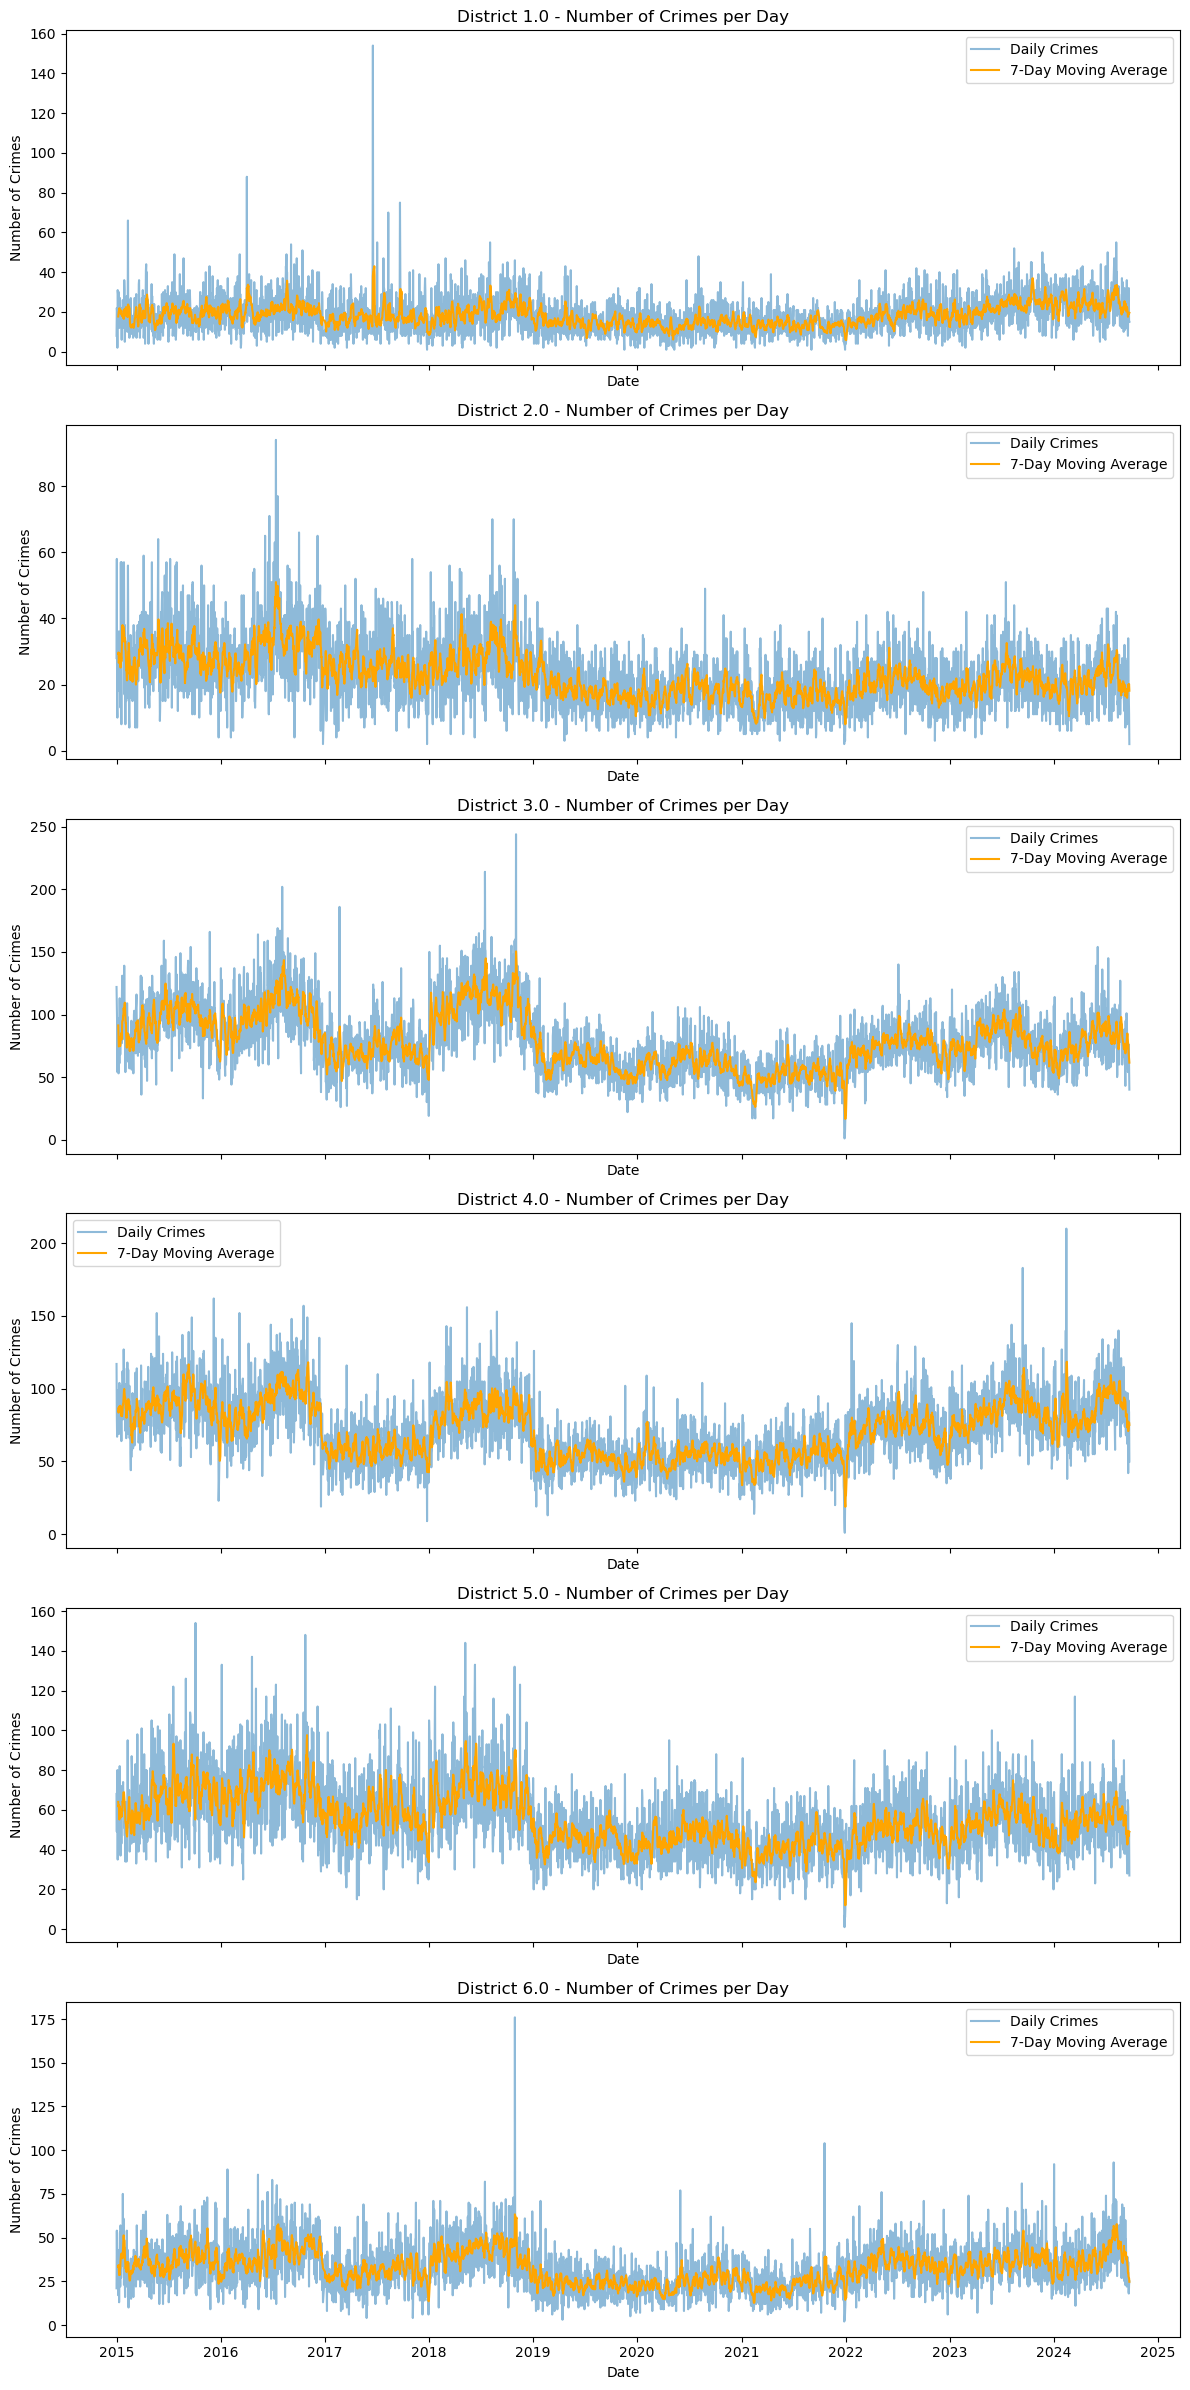

In [53]:
fig, axes = plt.subplots(num_dists, 1, figsize=(12, 4 * num_dists), sharex=True)

# Ensure axes is iterable even for a single subplot
if num_dists == 1:
    axes = [axes]

for i, dist_id in enumerate(dist_ids):
    # Filter data for this district
    dist_data = ts_df[ts_df['dist_id'] == dist_id].groupby('Reported_Date').size().sort_index()
    
    # Plot original data
    axes[i].plot(dist_data.index, dist_data, label='Daily Crimes', alpha=0.5)

    # Calculate and plot the 7-day moving average
    moving_average = dist_data.rolling(window=7).mean()
    axes[i].plot(moving_average.index, moving_average, label='7-Day Moving Average', color='orange')

    axes[i].set_title(f"District {dist_id} - Number of Crimes per Day")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Number of Crimes")
    axes[i].legend()

plt.tight_layout()
plt.show()

> crimes per month

<Axes: xlabel='Month'>

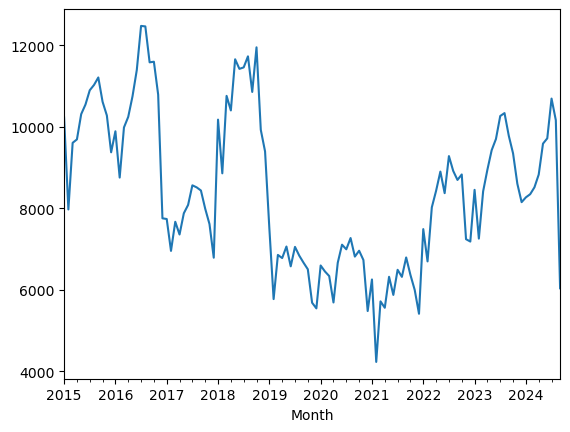

In [54]:
# Create a 'month' column for aggregation
ts_df['Month'] = ts_df['Reported_Date'].dt.to_period('M')
ts_df.groupby("Month").size().plot()

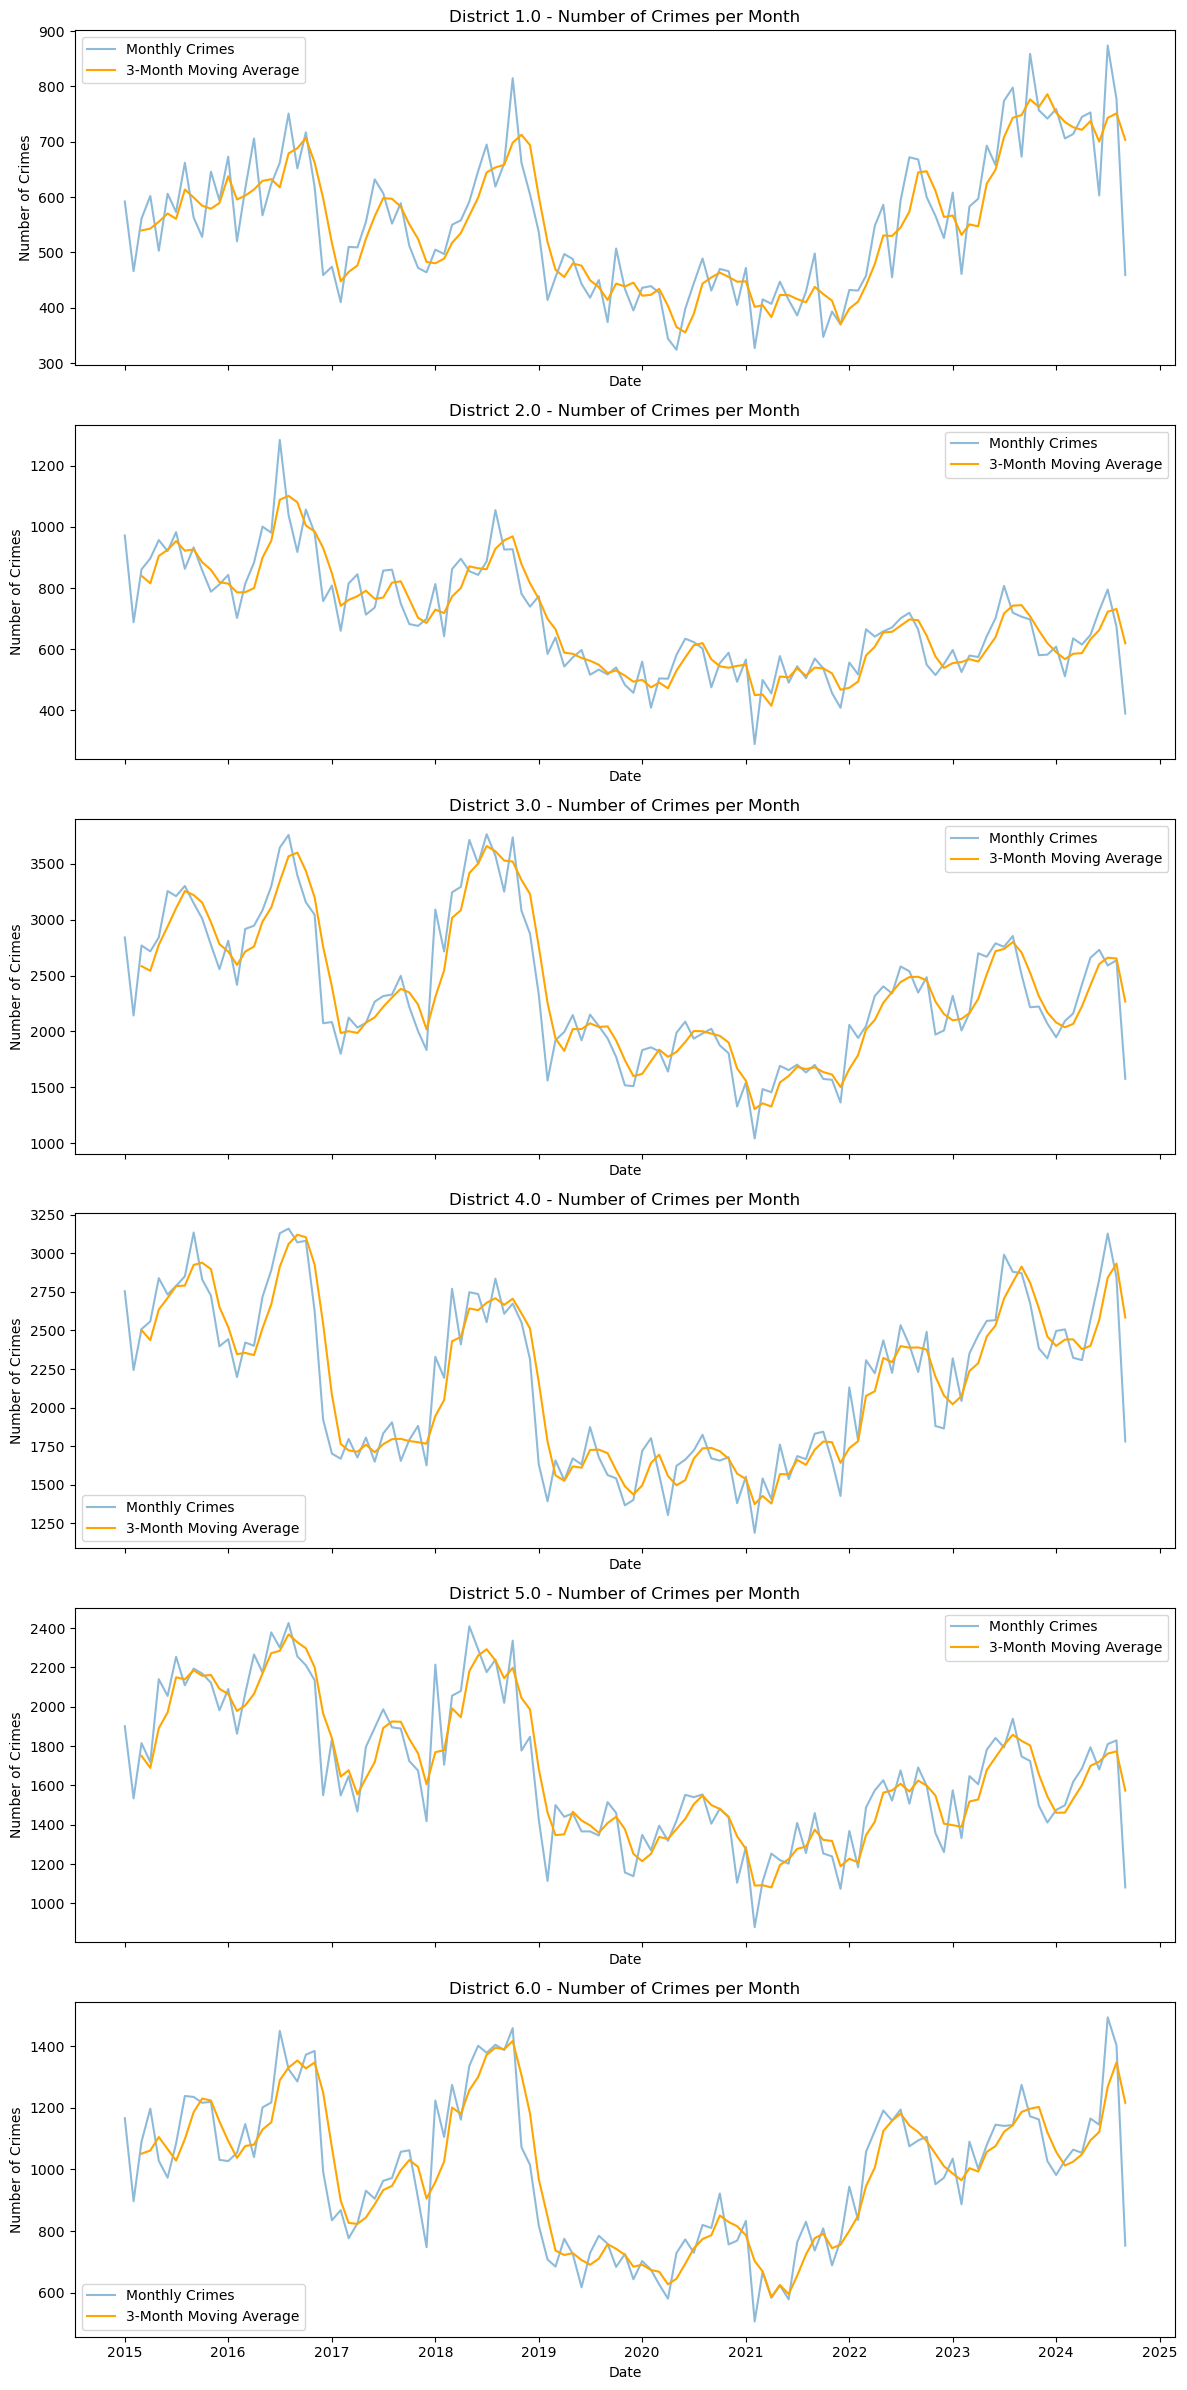

In [55]:
fig, axes = plt.subplots(num_dists, 1, figsize=(12, 4 * num_dists), sharex=True)

# Ensure axes is iterable even for a single subplot
if num_dists == 1:
    axes = [axes]

for i, dist_id in enumerate(dist_ids):
    # Filter data for this district
    dist_data = ts_df[ts_df['dist_id'] == dist_id].groupby('Month').size().sort_index()
    
    dist_data.index = dist_data.index.to_timestamp()

    # Plot original data
    axes[i].plot(dist_data.index, dist_data, label='Monthly Crimes', alpha=0.5)

    # Calculate and plot the moving average
    moving_average = dist_data.rolling(window=3).mean()
    axes[i].plot(moving_average.index, moving_average, label='3-Month Moving Average', color='orange')

    axes[i].set_title(f"District {dist_id} - Number of Crimes per Month")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Number of Crimes")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Time series

### Imports

In [56]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
dist_dfs_dict = {}
for i, dist_id in enumerate(dist_ids):
    # Filter data for this district
    dist_data = ts_df[ts_df['dist_id'] == dist_id]
    dist_dfs_dict[dist_id] = dist_data

In [72]:
dist_dfs_dict[1].head()

,Reported_Date,dist_id,Offense_Cluster,lon,lat,Month
3,2015-08-31,1.0,20,-89.0251,42.2167,2015-08
17,2015-04-03,1.0,1,-94.7150,39.2471,2015-04
22,2015-09-08,1.0,21,-94.6684,39.2470,2015-09
90,2015-05-24,1.0,58,-94.6496,39.2578,2015-05
111,2015-09-03,1.0,5,-94.6472,39.2468,2015-09


In [77]:
for dist_id, data in dist_dfs_dict.items():
    crime_counts = data.groupby("Reported_Date").size().reset_index(name='Crime_Count')
    dist_dfs_dict[dist_id] = crime_counts

In [79]:
dist_dfs_dict[1].head()

,Reported_Date,Crime_Count
0,2015-01-01,8
1,2015-01-02,22
2,2015-01-03,20
3,2015-01-04,2
4,2015-01-05,31


dist_id: 1.0


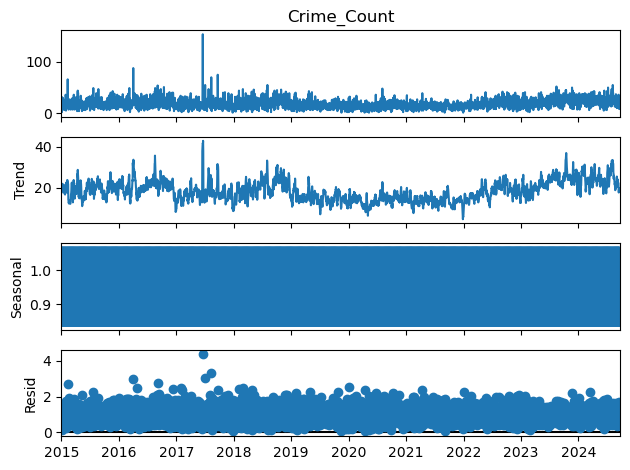

dist_id: 2.0


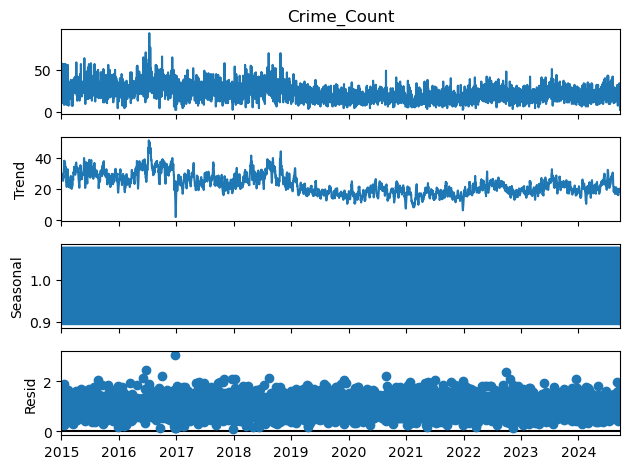

dist_id: 3.0


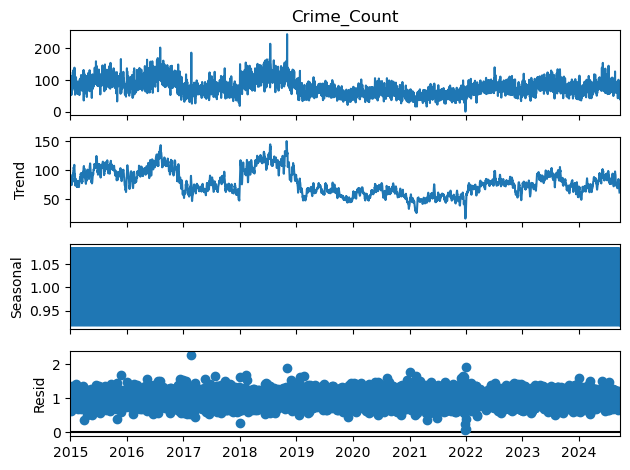

dist_id: 4.0


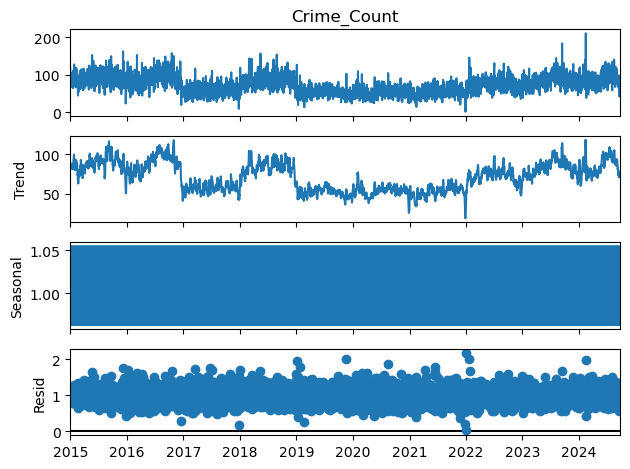

dist_id: 5.0


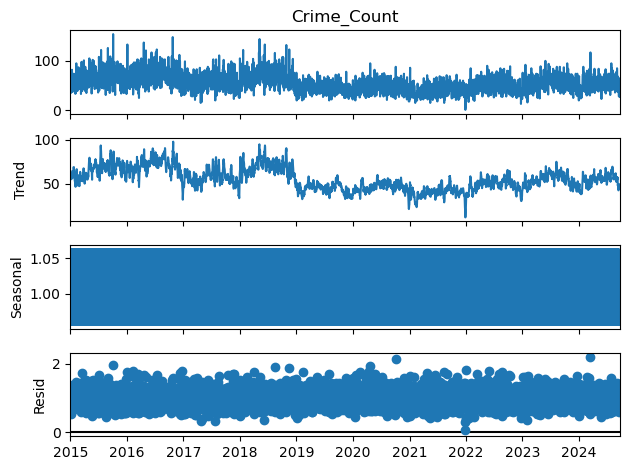

dist_id: 6.0


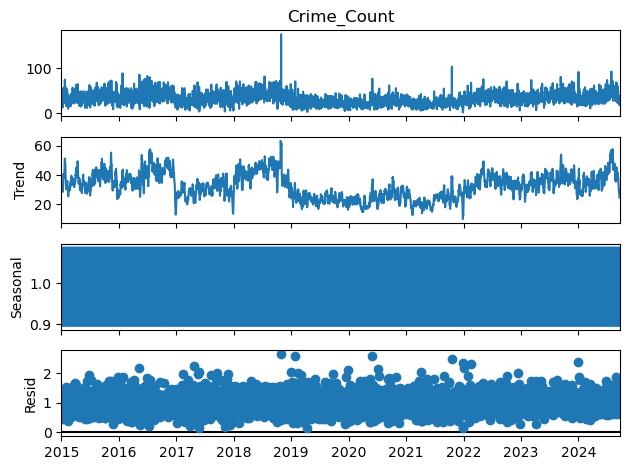

In [87]:
for dist_id, data in dist_dfs_dict.items():
    data.index = pd.to_datetime(data.Reported_Date)
    data = data.asfreq('d', method='ffill')#, method='ffill')

    # Decompose the time series
    decomposition = seasonal_decompose(data['Crime_Count'], model='multiplicative', period=7)

    # Plot the decomposition
    print(f"dist_id: {dist_id}")
    decomposition.plot()
    plt.show()
plt.close("all")

## Export

In [ ]:
#df.to_csv("..\\data\\mergedData\\merged_df_05.csv")

---